# Machine Learning: Predicción de fallos

In [1]:
# Libraries
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import os #look for directory
%matplotlib inline

###  Importar y selección de datos

In [2]:
# Read tables
def importarDatabase(name,index):
    #name='Database.csv'
    #inex=Name of the coloumn for index
    data = pd.read_csv(name)
    data.head()
    data=data.set_index(index,drop='False') #drop False, so if index is changed later, it is not lost
    data
    return data



In [3]:
# Import database
nombreDB = 'train_FD001'

data=importarDatabase("Database/"+nombreDB+".csv",'Maquina')
data.head(201)

,Tiempo,Lectura 1,Lectura 2,Lectura 3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPT,Fan,ByPass,...,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24
Maquina,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044
1,6,-0.0043,-0.0001,100,518.67,642.10,1584.47,1398.37,14.62,21.61,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100,38.98,23.3669
1,7,0.0010,0.0001,100,518.67,642.48,1592.32,1397.77,14.62,21.61,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100,39.10,23.3774
1,8,-0.0034,0.0003,100,518.67,642.56,1582.96,1400.97,14.62,21.61,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100,38.97,23.3106
1,9,0.0008,0.0001,100,518.67,642.12,1590.98,1394.80,14.62,21.61,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100,39.05,23.4066


# Eliminar todos los datos despues de 125 en c/máquina

# y antes de 20


In [4]:
data=data[data.Tiempo<=125]
data=data[data.Tiempo>=0]
data.head(2)

,Tiempo,Lectura 1,Lectura 2,Lectura 3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPT,Fan,ByPass,...,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24
Maquina,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236


Decido cuantos sensores a graficar

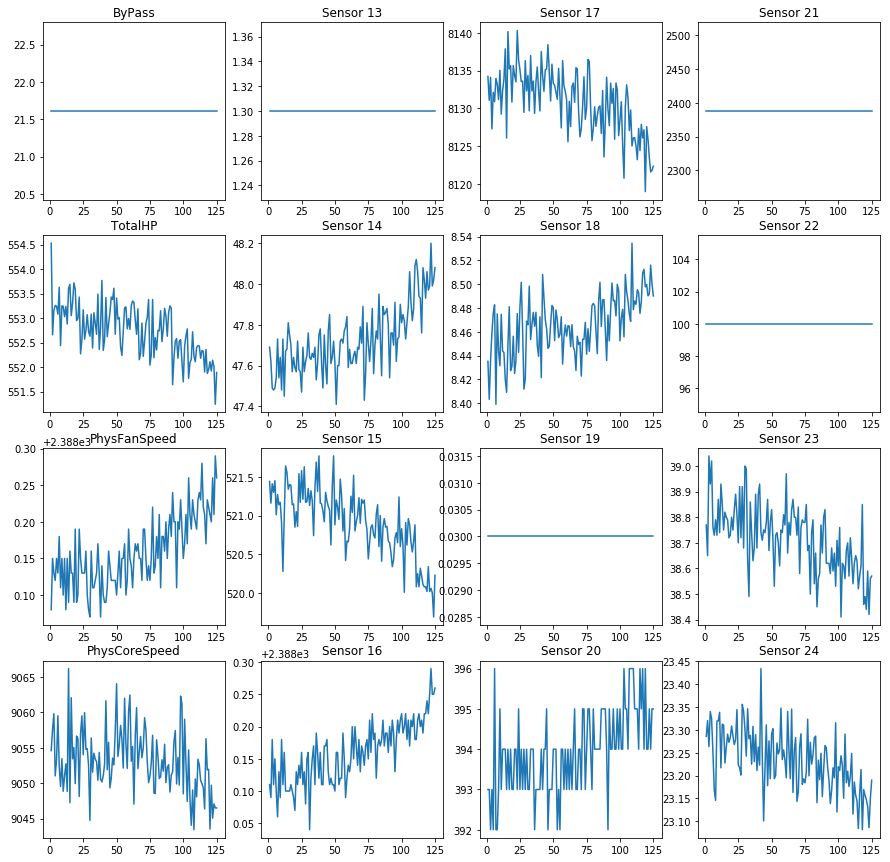

In [5]:
#Decido cuantos sensores a graficar (debe ser un numero con raíz entera para plotear)
numSensors=16

#Decidir qué máquina se va a graficar (para mostrar datos)
M=91

sizePlot=int(math.sqrt(numSensors))

#Create subplot
f, axarr = plt.subplots(sizePlot,sizePlot,figsize=(15,15)) # crear plot
x=0
for i in range (1,numSensors+1): #corre de 1 hasta numSensors
    col = 8 #* SE PUEDE MODIFICAR* empezar a plot sensores a partir de la columna col
    #Obtener x de la matriz para plots
    if x==sizePlot:
        x=0
    #obtener y
    y= math.ceil((i)/sizePlot)-1
    
    #Obtener datos sensor
    sensor=data.loc[M,data.columns.values[col+i]]
    time=data.loc[M,'Tiempo'] #vector de Tiempos de la Maquina x
    #Plot
    axarr[x,y].set_title(data.columns.values[col+i]) #title
    axarr[x,y].plot(time,sensor)                   #plot data

    x=x+1
plt.show()
#En los diferentes plots se pueden distinguir aquellos que no serán útiles para clasificación:
#aquellos que no varian (bybass solo varia en un dato
#(sospechosamente :P osea puede ser solo ruido) por loq ue tampoco lo tomo en cuenta)

### Dependiendo de las gráficas, seleccionar sensores más variables

In [6]:
#Seleccionar Sensores Importantes basados en la visualización y tiempo
sensorsName=('Tiempo','LPCOutletTemp','HPCOutletTemp','LPT','TotalHP','PhysFanSpeed','PhysCoreSpeed','Sensor 14','Sensor 15','Sensor 16','Sensor 17','Sensor 18','Sensor 23','Sensor 24')#,'Sensor 20'
#sensorsName=('Tiempo','TotalHP','Sensor 18','Sensor 23','Sensor 24')
#Importar datos de sensores
sensorData=data.loc[:,sensorsName]
sensorData['Numerar']=range(0,len(sensorData.index.values)) #Agregar, simplemente para ver numero de lectura
sensorData.head(5) #Muestra sólo primeras n filas

,Tiempo,LPCOutletTemp,HPCOutletTemp,LPT,TotalHP,PhysFanSpeed,PhysCoreSpeed,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 23,Sensor 24,Numerar
Maquina,,,,,,,,,,,,,,,
1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,39.06,23.4190,0
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,39.00,23.4236,1
1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,38.95,23.3442,2
1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,38.88,23.3739,3
1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,38.90,23.4044,4


In [7]:
#Mostrar solo sensores
sens=sensorData.iloc[:,1:len(sensorData.columns.values)-1] 
sens.head(3)

,LPCOutletTemp,HPCOutletTemp,LPT,TotalHP,PhysFanSpeed,PhysCoreSpeed,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 23,Sensor 24
Maquina,,,,,,,,,,,,,
1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,39.00,23.4236
1,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,38.95,23.3442


# 1 Quitar ruido mediante Rolling mean
En esta sección se suavizan todas las señales de las 100 máquinas, también se hace los mismo para una sola máquina M, para ver de manera independiente como se comporta (ver plots)

### Smooth una maquina 

In [14]:
# Smooth datos de UNA MAQUINA   (también se puede localizar en smoothData el index, debe ser lo mismo)
M=91 #* Se Puede Modificar *
smoothDataM = sensorData.loc[M,:] #Tomar solo máquina M

#Seleccionar Ventana
W= 5 #* SE PUEDE CAMBIAR *                # *Window se puede modificar* #The bigger the dataset, the bigger the window can be (to some extend)

#Rolling mean
smoothDataM = smoothDataM.rolling(window=W).mean() #The bigger the dataset, the bigger the window can be (to some extend)
#Reset valores de tiempo
smoothDataM['Tiempo']=sensorData['Tiempo']

smoothDataM.head(5) #show the first n, depending on the window=w, the first w won't have stimate rolled value

,Tiempo,LPCOutletTemp,HPCOutletTemp,LPT,TotalHP,PhysFanSpeed,PhysCoreSpeed,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 23,Sensor 24,Numerar
Maquina,,,,,,,,,,,,,,,
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,3.0,643.014,1590.806,1408.514,553.37,2388.126,9055.274,47.554,521.352,2388.128,8131.774,8.44178,38.882,23.30692,11252.0


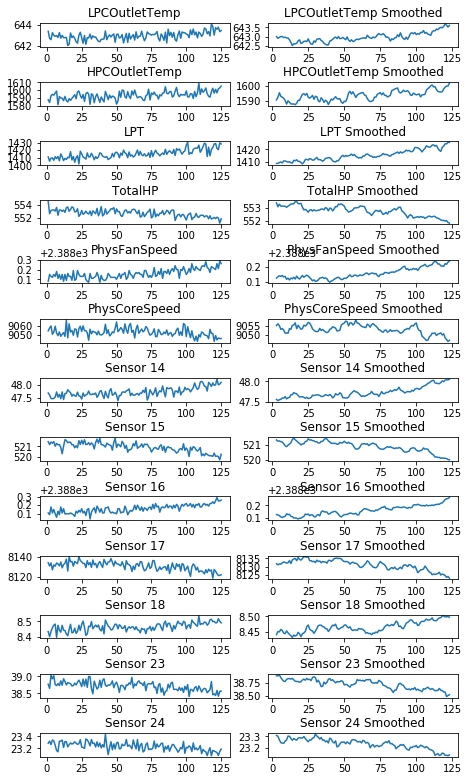

In [15]:
#Plot solo de la máquina M: Datos originales vs Datos sin ruido

fig, ax = plt.subplots(len(sensorsName)-1,2)
fig.set_size_inches(7.5, 13.5) #size
fig.subplots_adjust(hspace=1.5) #espacio entre subplots

#ax.axes.get_yaxis().set_visible(False)

for i in range (0,len(sensorsName)-1):#corre de 1 hasta len(sensorsName) (-1 porque la 1ra columna es el tiempo)
    #Datos originales
    ax[i,0].plot('Tiempo',sensorsName[i+1],data=data.loc[M,:]) #sólo de la máquina M
    ax[i,0].set_title(sensorsName[i+1])
    #Datos sin ruido
    ax[i,1].plot('Tiempo',sensorsName[i+1],data=smoothDataM)
    ax[i,1].set_title(sensorsName[i+1] +' Smoothed') #en todas es i+1 porque el 1ro la variable Tiempo


plt.show()

### Smooth todas las maquinas

In [16]:
# #Tratar de smooth sobre todas las máquinas, no cada máquina por separado

# #Seleccionar Ventana
# W= 5 #* SE PUEDE CAMBIAR *                # *Window se puede modificar* #The bigger the dataset, the bigger the window can be (to some extend)

# smoothData = sensorData.rolling(window=W).mean()
# #Reset valores de tiempo
# smoothData['Tiempo']=sensorData['Tiempo']

# smoothData.head(5) #Mostrar primeros N



In [17]:
# Rolling mean: TODAS LAS MAQUINAS por separado

#Seleccionar Ventana
W= 5 #* SE PUEDE CAMBIAR *                # *Window se puede modificar* #The bigger the dataset, the bigger the window can be (to some extend)

# 1 Primero crear el arreglo de pandas
smoothData = sensorData.iloc[len(sensorData):] #borrar todos los datos, solo dejar nombres de columnas e index

# 2 Anexar smooothed data de las máquina
for i in np.unique(sensorData.index):
    #Rolling mean
    rollingMean = sensorData.loc[i,:].rolling(window=W).mean() # *Window se puede modificar* #The bigger the dataset, the bigger the window can be (to some extend)
    #Anexar a base de datos
    smoothData = smoothData.append(rollingMean) #Tomar máquina i (según yo, se debe hacer máquina por máquina, no todos los datos a la vez)

    
#Reset valores de tiempo
smoothData['Tiempo']=sensorData['Tiempo']

smoothData[100:150]#.head(5) #Mostrar primeros N

,Tiempo,LPCOutletTemp,HPCOutletTemp,LPT,TotalHP,PhysFanSpeed,PhysCoreSpeed,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 23,Sensor 24,Numerar
Maquina,,,,,,,,,,,,,,,
1,101,642.300,1590.684,1406.652,553.500,2388.072,9046.950,47.498,521.768,2388.076,8129.372,8.42384,38.894,23.32158,98.0
1,102,642.456,1589.352,1405.774,553.504,2388.084,9048.002,47.504,521.710,2388.074,8129.704,8.43296,38.880,23.33538,99.0
1,103,642.498,1587.384,1405.504,553.682,2388.090,9049.560,47.544,521.530,2388.082,8129.006,8.43798,38.826,23.37008,100.0
1,104,642.464,1586.964,1405.528,553.662,2388.090,9049.478,47.532,521.722,2388.080,8129.030,8.42878,38.854,23.39148,101.0
1,105,642.422,1586.694,1403.902,553.440,2388.094,9050.006,47.466,521.774,2388.080,8129.334,8.43048,38.822,23.38682,102.0
1,106,642.408,1587.668,1404.110,553.486,2388.098,9049.510,47.430,521.698,2388.082,8129.416,8.43670,38.888,23.38680,103.0
1,107,642.344,1588.872,1404.972,553.550,2388.082,9048.974,47.402,521.772,2388.086,8129.816,8.43030,38.902,23.39546,104.0
1,108,642.600,1589.800,1404.224,553.708,2388.092,9047.724,47.410,521.794,2388.072,8131.240,8.42770,38.914,23.37032,105.0
1,109,642.640,1588.964,1404.794,553.694,2388.096,9049.004,47.458,521.642,2388.076,8131.056,8.42242,38.932,23.37368,106.0


Plot: Para el algoritmo PCA, es necesario extraer la información de las 100 máquinas.

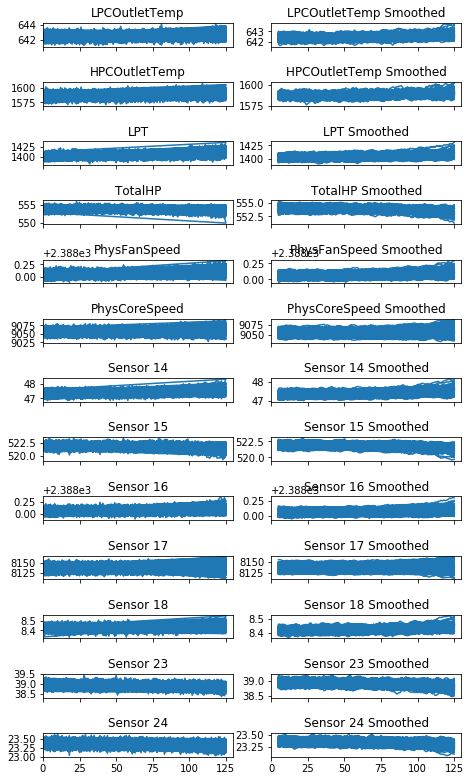

In [18]:
#Plot todas las máquinas

fig, ax = plt.subplots(len(sensorsName)-1,2,sharex=True)
fig.set_size_inches(7.5, 13.5) #size
fig.subplots_adjust(hspace=1.5) #espacio entre subplots


for i in range (0,len(sensorsName)-1):#corre de 1 hasta len(sensorsName) (-1 porque la 1ra columna es el tiempo)
    #Datos originales
    ax[i,0].plot('Tiempo',sensorsName[i+1],data=data) #máquina M
    ax[i,0].set_title(sensorsName[i+1])
    #Datos sin ruido
    ax[i,1].plot('Tiempo',sensorsName[i+1],data=smoothData)
    ax[i,1].set_title(sensorsName[i+1] +' Smoothed') #en todas es i+1 porque la 1ra variable es Tiempo


plt.xlim(0, 130) #Mostrar solo n tiempos
plt.show()

Extraer los primero 100 datos donde todas las señales de todas las máquinas están completas

# 2 Monitoreo de equipo
¿Cómo determinar a partir de las señales que el equipo opera en condiciones normales? Un método es utilizar el Gráfico de Control (control chart). Mientras la señal se encuentre dentro de los límites superior e inferior se dice que la máquina opera en condiciones normales. Si sale de los límites, posiblemente haya un problema.
Sin embargo, para más de un sensor es difícil de visualizar y predecir, por lo que se utiliza Machine Learning.

### Leer todos los datos (training and test)

In [19]:
# Import databases

# 1 Crear arreglos
dataTest=[] 
dataTrain=[]

# 2 Importar cada base de datos
for i in range (1,5): #corre de 1 a 4
    # Test
    dataTest.append(importarDatabase(("Database/test_FD00"+str(i) +".csv"),'Maquina'))
    
    #Train
    dataTrain.append(importarDatabase(("Database/train_FD00"+str(i) +".csv"),'Maquina'))


In [20]:
# Mostrar base que queramos (para des-comentar Crtl+/)

# Nota: Número de trajectorias por archivo (train/test):
# 0: 100/100  (base de datos 1, en posición 0)
# 1: 260/259
# 2: 100/100
# 3: 248/249

# Mostrar: 
dataTrain[0].tail(10) # mostrar últimas 10
#dataTrain[1].tail(10)
#dataTrain[2].tail(10)
#dataTrain[3].tail(10)
# dataTest[0].tail(10)
# dataTest[1].tail(10)
# dataTest[2].tail(10)
# dataTest[3].tail(10)

,Tiempo,Lectura 1,Lectura 2,Lectura 3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPT,Fan,ByPass,...,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24
Maquina,,,,,,,,,,,,,,,,,,,,,
100,191,-0.0005,0.0000,100,518.67,643.69,1610.87,1427.19,14.62,21.61,...,519.80,2388.28,8143.56,8.5092,0.03,398,2388,100,38.39,23.1218
100,192,-0.0009,0.0001,100,518.67,643.53,1601.23,1419.48,14.62,21.61,...,520.59,2388.21,8143.46,8.4892,0.03,397,2388,100,38.56,23.0770
100,193,-0.0001,0.0002,100,518.67,643.09,1599.81,1428.93,14.62,21.61,...,520.11,2388.19,8142.02,8.5424,0.03,397,2388,100,38.47,23.0230
100,194,-0.0011,0.0003,100,518.67,643.72,1597.29,1427.41,14.62,21.61,...,519.55,2388.22,8139.67,8.5215,0.03,394,2388,100,38.38,23.1324
100,195,-0.0002,-0.0001,100,518.67,643.41,1600.04,1431.90,14.62,21.61,...,519.71,2388.28,8142.90,8.5519,0.03,394,2388,100,38.14,23.1923
100,196,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,21.61,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735
100,197,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,21.61,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594
100,198,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,21.61,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333
100,199,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,21.61,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640


## PCA - principal component analysis
Reducción de dimensiones por componentes principales

### a) Estandarizar datos
Para realizar PCA hay que estandarizar los datos, es decir, pasarlos a una misma escala, ya que el algoritmo encuentra varianza entre puntos y algunas variables tienen un rango de datos mayor que otros.

Sigamos utilizando por ahora solo la primera base de datos con 100 máquinas (ya suavisada: smoothData)

In [21]:
smoothData.head()

,Tiempo,LPCOutletTemp,HPCOutletTemp,LPT,TotalHP,PhysFanSpeed,PhysCoreSpeed,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 23,Sensor 24,Numerar
Maquina,,,,,,,,,,,,,,,
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,642.208,1587.03,1403.206,554.164,2388.07,9049.566,47.328,522.282,2388.048,8134.194,8.41334,38.958,23.39302,2.0


In [22]:
smoothData.std(axis=0)

Tiempo             36.084681
LPCOutletTemp       0.286611
HPCOutletTemp       3.261871
LPT                 5.369679
TotalHP             0.545851
PhysFanSpeed        0.050641
PhysCoreSpeed       8.397562
Sensor 14           0.165735
Sensor 15           0.466642
Sensor 16           0.051273
Sensor 17           8.148308
Sensor 18           0.021672
Sensor 23           0.103437
Sensor 24           0.062401
Numerar          3608.576926
dtype: float64

In [23]:
#Estandarizar datos

#Al estandarizar deben ser sobre todos los datos
Xtrain = smoothData.dropna() # eliminar valores NaN (aparecen cuando se suavizan los datos)

Xtrain = (Xtrain - Xtrain.mean(axis=0))/Xtrain.std(axis=0)
Xtrain.head()

,Tiempo,LPCOutletTemp,HPCOutletTemp,LPT,TotalHP,PhysFanSpeed,PhysCoreSpeed,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 23,Sensor 24,Numerar
Maquina,,,,,,,,,,,,,,,
1,-1.717724,-0.935073,-0.305254,-0.290972,0.736556,-0.032101,-0.975293,-0.523356,1.139836,-0.441230,-0.509005,-0.570032,0.615043,0.897033,-1.731292
1,-1.689095,-0.739687,-0.625929,-0.374031,0.850140,-0.190077,-0.892173,-0.897447,1.148408,-0.402223,-0.650630,-0.650318,0.460360,0.730049,-1.731015
1,-1.660467,-0.509410,-0.595272,-0.574043,1.066316,-0.269065,-0.533498,-1.054323,1.165552,-0.558252,-0.630258,-0.967772,0.653714,0.581975,-1.730738
1,-1.631838,-0.362870,-0.903684,-0.694348,0.916092,-0.585017,-0.822629,-1.090526,1.186981,-0.558252,-0.683275,-1.061901,0.692385,0.474285,-1.730461
1,-1.603209,-0.523366,-0.401518,-0.957678,0.637628,-0.821980,-0.894555,-0.897447,0.728385,-0.675274,-0.883071,-1.019451,1.021086,0.579091,-1.730183


In [24]:
# Dejar solo sensores - quitar datos que no sirven para análisis (como tiempo y numeración)
#----Tiempo se queda
Xtrain = Xtrain.drop(['Numerar'],1) #1 para columnas
#Xtrain = Xtrain.drop(['Tiempo','Numerar'],1) #1 para columnas

print ("Numero de sensores: ",len(Xtrain.columns))
Xtrain.head() # mostrar primeros 3 renglones

Numero de sensores:  14


,Tiempo,LPCOutletTemp,HPCOutletTemp,LPT,TotalHP,PhysFanSpeed,PhysCoreSpeed,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 23,Sensor 24
Maquina,,,,,,,,,,,,,,
1,-1.717724,-0.935073,-0.305254,-0.290972,0.736556,-0.032101,-0.975293,-0.523356,1.139836,-0.441230,-0.509005,-0.570032,0.615043,0.897033
1,-1.689095,-0.739687,-0.625929,-0.374031,0.850140,-0.190077,-0.892173,-0.897447,1.148408,-0.402223,-0.650630,-0.650318,0.460360,0.730049
1,-1.660467,-0.509410,-0.595272,-0.574043,1.066316,-0.269065,-0.533498,-1.054323,1.165552,-0.558252,-0.630258,-0.967772,0.653714,0.581975
1,-1.631838,-0.362870,-0.903684,-0.694348,0.916092,-0.585017,-0.822629,-1.090526,1.186981,-0.558252,-0.683275,-1.061901,0.692385,0.474285
1,-1.603209,-0.523366,-0.401518,-0.957678,0.637628,-0.821980,-0.894555,-0.897447,0.728385,-0.675274,-0.883071,-1.019451,1.021086,0.579091


### b) PCA - principal component analysis
Obtener los componentes principales

In [25]:
# Realizar PCA (necesita TODAS las maquinas)

def PCAmanual(transf_data):
    components== len(transf_data.columns.values)
    # 1) center data around the mean
    # 2) compute the covariance matrix
    cov_mat = np.cov(transf_data.T)
    # 3) find the eigenvalues and eigenvectors of the covariance matrix
    [eigen_val, eigen_vec] = np.linalg.eig(cov_mat)
    # 4a) calculate new dataset in the eigenvectors basis
    # sorting the eigenvalues in descending order
    idx = np.argsort(eigen_val)
    idx = idx[::-1]
    # sorting eigenvalues
    eigen_val = eigen_val[idx]
    principalComp = eigen_vec.T.dot(transf_data.T).T  #apply the trasformation with the sorted eigenvectors matrix
    #Crear dataframe con los componentes principales
    principalComponents = pd.DataFrame(data = principalComp , columns = [''.join(map(str, ['Princ Comp ',i]))   for i in  list(range(components)) ]) #Las columnas son una función FOR para crear los nombres
  
    return(eigen_vec,principalComponents)



def PCA(data,components):
    from sklearn.decomposition import PCA

    #Ingresar numero de componentes para PCA
    pca=PCA(n_components=components)
    
    #Transformar los datos: Obtener principal compinents
    principalComp = pca.fit_transform(data) #fit and transform (standardizing) the features
    
    #Crear dataframe con los componentes principales
    principalComponents = pd.DataFrame(data = principalComp , columns = [''.join(map(str, ['Princ Comp ',i]))   for i in  list(range(components)) ]) #Las columnas son una función FOR para crear los nombres
    
    return pca , principalComponents


# 1 Seleccionar número de componentes a utilizar ********************
N = len(Xtrain.columns.values) # *Puede cambiarse* No mayor a número de sensores

# 2 Realizar PCA en datos SOLO maquina M
pca , principalComponents = PCA(Xtrain , N)  # *Insert inverse matrix for PCA*

#Checar dimensiones
print('Checar que dimensiones coincidan: \n')
print('Largo de base de datos: ',len(Xtrain))
print('Largo de component princ: ',len(principalComponents))
print('\n')

principalComponents

Checar que dimensiones coincidan: 

Largo de base de datos:  12100
Largo de component princ:  12100




,Princ Comp 0,Princ Comp 1,Princ Comp 2,Princ Comp 3,Princ Comp 4,Princ Comp 5,Princ Comp 6,Princ Comp 7,Princ Comp 8,Princ Comp 9,Princ Comp 10,Princ Comp 11,Princ Comp 12,Princ Comp 13
0,-1.821223,-2.098130,-0.629838,0.364521,0.338975,0.258268,-0.040077,-0.067802,0.316876,0.465633,0.377509,0.143790,-0.268445,-0.208434
1,-1.974335,-2.136701,-0.553180,0.049744,0.181465,0.179264,0.201640,0.148447,0.324345,0.531502,0.174686,-0.107205,-0.182928,-0.031324
2,-2.304117,-1.917942,-0.607506,0.138273,-0.185711,-0.089949,0.377446,0.197365,0.343004,0.432355,0.159174,-0.174442,-0.273671,0.203186
3,-2.401667,-2.116347,-0.458904,-0.123578,-0.360643,-0.202878,0.435433,0.225406,0.136612,0.491349,0.011242,-0.085989,0.023210,0.087204
4,-2.278058,-2.192677,-0.430589,0.429916,-0.330768,-0.278206,0.123112,0.076358,-0.177722,0.074787,-0.249238,0.162859,0.206623,0.223801
5,-2.370160,-2.327089,-0.330655,1.045501,0.024327,-0.210603,-0.004484,-0.001391,-0.389173,-0.079125,-0.462857,-0.084130,0.222978,0.265771
6,-2.348131,-2.212200,-0.361938,0.854101,-0.032830,0.201027,-0.162765,-0.040522,-0.363241,-0.129986,-0.561116,-0.074327,0.084214,0.117909
7,-2.445972,-2.425799,-0.176512,0.365196,0.242635,0.133789,-0.169660,-0.139151,-0.225433,-0.229394,-0.780409,-0.227011,-0.191342,-0.086759
8,-1.912971,-2.353810,-0.243586,0.164745,0.011756,0.129947,-0.172269,-0.216657,-0.308343,-0.420794,-0.666604,-0.369943,-0.483113,0.003090
9,-1.843268,-2.160836,-0.328579,0.251251,-0.175888,0.045194,-0.431823,-0.064834,0.012257,-0.478584,-0.593887,-0.160085,-0.689940,-0.154725


### Plot varianzas atribuidos a cada PC
"La varianza explicada nos dice cuanta información (varianza) es atribuida a cada componente principal"

[10.085560912843341, 11.897435692734062, 12.552430959559505, 12.831060790476755, 13.04615966935522, 13.226625311156072, 13.396388261032934, 13.540093215042615, 13.653656225641811, 13.746717836437483, 13.824595510721114, 13.894913671107238, 13.962609520265307, 13.998842975206625]


<Figure size 432x288 with 0 Axes>

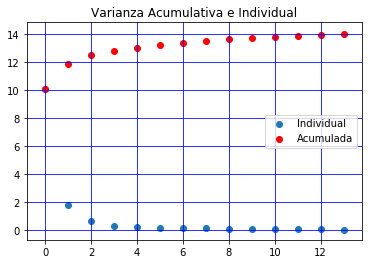

In [26]:
#Plot varianza explicada
plt.gcf().clear() #limpiar plots antiguos
fig, ax = plt.subplots()

# Varianza cumulativa
varSum=[]
suma=0
for i in range (0,N): #corre de 0 a N-1
    suma= suma + pca.explained_variance_[i]
    varSum.append(suma)

    
print(varSum)  
#Plot varianza individual
ax.scatter(range(N), pca.explained_variance_,label="Individual")
#Plot varianza acumulada
ax.scatter(range(N),varSum,color='r',label='Acumulada')


ax.set_title("Varianza Acumulativa e Individual")
ax.grid(color='b')
ax.legend(loc='right')


plt.show()

### Plot porcentajes atribuidos a cada PC

Porcentajes por componentes (acumulados): [72.045674994039828, 84.988707379642946, 89.667631687784024, 91.658009259778595, 93.194556810597092, 94.483703650235739, 95.696396371895162, 96.722945167850639, 97.53417657319126, 98.198957305145285, 98.755272383623989, 99.257586471371567, 99.741168216505542, 100.00000000000001]


<Figure size 432x288 with 0 Axes>

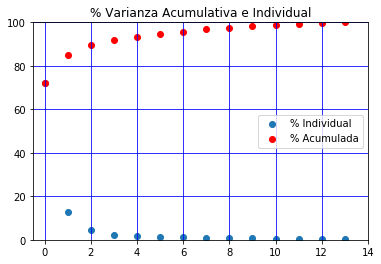

In [27]:
# Plot porcentajes por los que responden
plt.gcf().clear() #limpiar plots antiguos
fig, ax = plt.subplots()
#Obtener porcentajes individuales
porcentajes = pca.explained_variance_ / sum(pca.explained_variance_) *100



# Varianza cumulativa
varSum=[]
suma=0
for i in range (0,N): #corre de 0 a N-1
    suma= suma + porcentajes[i]
    varSum.append(suma)


print("Porcentajes por componentes (acumulados):",varSum)

#Plot varianza individual
ax.scatter(range(N), porcentajes,label="% Individual")

#Plot varianza acumulada
ax.scatter(range(N),varSum,color='r',label='% Acumulada')


ax.set_title("% Varianza Acumulativa e Individual")
ax.grid(color='b')
ax.legend(loc='right')
ax.set_xlim([-0.5,N])
ax.set_ylim([0,100])

plt.show()

In [28]:
print('\n Esto quiere decir que el primer más el segundo componente identifican aprox. el ',varSum[1],'% de la varianza de los datos \
(si es más de 50% es aceptable, más del 80% es bueno) \n \
También trás cambiar el filtro, "noté" que incrementando la ventana de filtrado, el porcentaje de clasificación sube')


 Esto quiere decir que el primer más el segundo componente identifican aprox. el  84.9887073796 % de la varianza de los datos (si es más de 50% es aceptable, más del 80% es bueno) 
 También trás cambiar el filtro, "noté" que incrementando la ventana de filtrado, el porcentaje de clasificación sube


### Checar matriz de covarianza


['Tiempo', 'LPCOutletTemp', 'HPCOutletTemp', 'LPT', 'TotalHP', 'PhysFanSpeed', 'PhysCoreSpeed', 'Sensor 14', 'Sensor 15', 'Sensor 16', 'Sensor 17', 'Sensor 18', 'Sensor 23', 'Sensor 24']


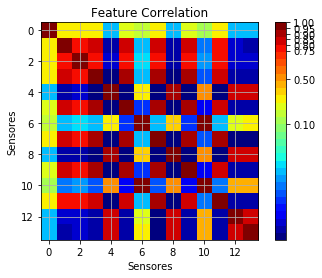

In [29]:
#Mostrar matriz de covarianza para más información

def correlation_matrix(df):
    from matplotlib import cm as cm
    #Obtener covarianza
    covVal=np.cov(Xtrain.T) #transpuesta: dimensiones para la cov. (sensoresxdatos)(datosxsensores) = (sensoresxsensores) dim. matriz de cov.
    #Crear plot
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    #Plot
    cax = ax1.imshow(covVal, interpolation="nearest", cmap=cmap)
    #Configurar plot
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=list(Xtrain.columns.values[:])
    print(labels)
    #ax1.set_xticklabels(labels[:],fontsize=len(Xtrain.columns.values[:]))
    #ax1.set_yticklabels(labels[0:],fontsize=3)
    ax1.set_xlabel('Sensores')
    ax1.set_ylabel('Sensores')
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.1,.5,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(Xtrain)

### Plot datos sobre los 2 componentes principales

In [30]:
#Data final: seleccionar 2 componentes principales (PC) a mostrar

finalDf = principalComponents.iloc[:,(1,2)]
finalDf.tail()

,Princ Comp 1,Princ Comp 2
12095,2.179909,0.403739
12096,2.243026,0.416951
12097,2.239606,0.415193
12098,2.226243,0.419498
12099,2.379166,0.327320


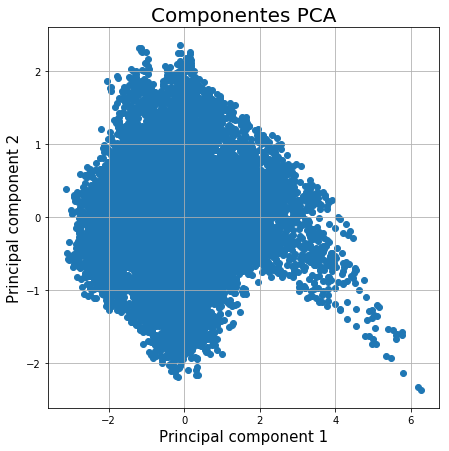

In [31]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Componentes PCA', fontsize=20)
ax.set_xlabel('Principal component 1',fontsize=15)
ax.set_ylabel('Principal component 2',fontsize=15)

#Plot
ax.scatter(finalDf.loc[:,finalDf.columns.values[0]],finalDf.loc[:,finalDf.columns.values[1]])


ax.grid()

In [32]:
#Obtener covarianza
covVal=np.cov(Xtrain.T) #transpuesta: dimensiones para la cov. (sensoresxdatos)(datosxsensores) = (sensoresxsensores) dim. matriz de cov.

#Crear dataframe con los componentes principales
covMatrix = pd.DataFrame(data = covVal , columns = [''.join(map(str, [i]))   for i in  list(range(len(covVal))) ]) #Las columnas son una función FOR para crear los nombres
covMatrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.303599,0.309751,0.337134,-0.304350,0.236386,0.197091,0.327174,-0.310201,0.237302,0.118625,0.317495,-0.337649,-0.324155
1,0.303599,1.000000,0.748312,0.833712,-0.828040,0.823150,-0.292074,0.852903,-0.848008,0.821972,-0.445984,0.804603,-0.792936,-0.803269
2,0.309751,0.748312,1.000000,0.793852,-0.789640,0.770210,-0.242949,0.805548,-0.801820,0.768693,-0.390163,0.768206,-0.755239,-0.761667
3,0.337134,0.833712,0.793852,1.000000,-0.885319,0.880517,-0.312393,0.909222,-0.901181,0.877742,-0.477332,0.862749,-0.853909,-0.850728
4,-0.304350,-0.828040,-0.789640,-0.885319,1.000000,-0.888691,0.354581,-0.908242,0.898266,-0.885290,0.512088,-0.859601,0.845562,0.848058
5,0.236386,0.823150,0.770210,0.880517,-0.888691,1.000000,-0.545827,0.900830,-0.901794,0.931722,-0.689299,0.846995,-0.836108,-0.843941
6,0.197091,-0.292074,-0.242949,-0.312393,0.354581,-0.545827,1.000000,-0.338715,0.372672,-0.545337,0.944890,-0.290912,0.279791,0.300781
7,0.327174,0.852903,0.805548,0.909222,-0.908242,0.900830,-0.338715,1.000000,-0.921552,0.900058,-0.504785,0.877491,-0.870164,-0.873713
8,-0.310201,-0.848008,-0.801820,-0.901181,0.898266,-0.901794,0.372672,-0.921552,1.000000,-0.901352,0.533098,-0.870508,0.856834,0.868049
9,0.237302,0.821972,0.768693,0.877742,-0.885290,0.931722,-0.545337,0.900058,-0.901352,1.000000,-0.688441,0.845110,-0.835009,-0.841405


# Analisis en 2 dimensiones

### Plot solo primero y último punto de cada máquina

In [33]:
# 1 Obtener datos: maquinas y componentes principales

#Copiar datos finales como componentes principales
finalDfMaquina = finalDf
#Obtener Máquinas
indexFrame = pd.DataFrame({'Maquina' : Xtrain.index.values})
#Agregar a que máquina pertenecen
finalDfMaquina = finalDfMaquina.join(indexFrame)

finalDfMaquina.head(2)

,Princ Comp 1,Princ Comp 2,Maquina
0,-2.098130,-0.629838,1
1,-2.136701,-0.553180,1


In [34]:
# 2 Obtener Primer y Último PC de cada máquina

#Crear DataFrames con 3 columnas (PC1, PC2 y maquina)
puntosStart = pd.DataFrame(columns=['Princ Comp 1','Princ Comp 2','Maquina'])
puntosEnd = pd.DataFrame(columns=['Princ Comp 1','Princ Comp 2','Maquina'])

#Obtener datos máquina i
for i in np.unique(finalDfMaquina.loc[:,'Maquina']):
    #Tomar datos máquina i
    maqI=finalDfMaquina.loc[finalDfMaquina['Maquina']==i,['Princ Comp 1','Princ Comp 2','Maquina']]

    #Obtener datos con índice menor
    pStart= maqI.loc[ min(maqI.index) , :]
    #Agregar a arreglo de puntos de Inicio (Start)
    puntosStart = puntosStart.append(pStart)
    
    
    #Obtener datos con indice mayor
    pEnd= maqI.loc[ max(maqI.index) , :]
    #Agregar a arreglo de puntos de Inicio (Start)
    puntosEnd = puntosEnd.append(pEnd)
    
puntosStart.head(10)
puntosEnd.tail()

,Princ Comp 1,Princ Comp 2,Maquina
11615,0.058621,2.001073,96.0
11736,1.914182,1.071465,97.0
11857,2.499737,0.173366,98.0
11978,0.718965,1.315281,99.0
12099,2.379166,0.327320,100.0


In [35]:
# 3 Eliminar columna Maquina
puntosStart = puntosStart.drop('Maquina',1)
puntosEnd = puntosEnd.drop('Maquina',1)

puntosEnd.head()

,Princ Comp 1,Princ Comp 2
120,-0.154699,1.650556
241,0.148599,2.235494
362,4.473974,-0.292142
483,2.624334,0.439040
604,2.456128,1.086180


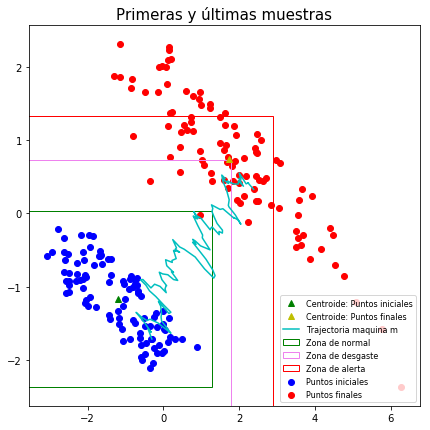

In [36]:
# 4 Plot con líneas

fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Primeras y últimas muestras', fontsize=15)

# Plot puntos iniciales y finales
ax.scatter(puntosStart.loc[:,puntosStart.columns.values[0]],puntosStart.loc[:,puntosStart.columns.values[1]],color='b',label='Puntos iniciales')
ax.scatter(puntosEnd.loc[:,puntosEnd.columns.values[0]],puntosEnd.loc[:,puntosEnd.columns.values[1]],color='r',label='Puntos finales')



# Plot centroides--------------------------
# 1 Centroide de puntos de inicio Start
centroidex = sum( puntosStart.loc[:,puntosStart.columns.values[0]] ) / len(puntosStart)
centroidey = sum( puntosStart.loc[:,puntosStart.columns.values[1]] ) / len(puntosStart)
centrStart=[centroidex , centroidey] #Centroide

#2 Centroide de puntos finales End
centroidex = sum( puntosEnd.loc[:,puntosEnd.columns.values[0]] ) / len(puntosEnd)
centroidey = sum( puntosEnd.loc[:,puntosEnd.columns.values[1]] ) / len(puntosEnd)
centrEnd=[centroidex , centroidey] #Centroide

#Plot centroides
ax.plot(centrStart[0],centrStart[1] ,'g^',label='Centroide: Puntos iniciales')
ax.plot(centrEnd[0],centrEnd[1] ,'y^',label='Centroide: Puntos finales')




#Plot trajectoria de una maquina-------------
m=100

#5#78#1#70#39#5           #empiezan dentro zona fallo
#56#2#91#57#10#7#63#80      #empiezan afuera de la zona fallo

PCmaqI=finalDfMaquina.loc[finalDfMaquina['Maquina']==m]
ax.plot(PCmaqI['Princ Comp 1'] , PCmaqI['Princ Comp 2'],'c',label='Trajectoria maquina m')

#Plot punto final e inicial
PCmaqI=finalDfMaquina.loc[finalDfMaquina['Maquina']==2]
#ax.plot(PCmaqI['Princ Comp 2'][0] , PCmaqI['Princ Comp 2'][len(PCmaqI)-1],'y^' )


#Plot regiones --------------------------------
import matplotlib
#Normal
spamxF=2.5#1.0   #*Se puede cambiar* 
spamyF=1.2#1.7     #*Se puede cambiar*
x1F=[centrStart[0]-spamxF , centrStart[1]-spamyF] #punto inferior x,y del rectangulo
x2F=[centrStart[0]+spamxF , centrStart[1]+spamyF] #punto superior x,y del rectangulo
rect1 = matplotlib.patches.Rectangle((x1F[0],x1F[1]), spamxF*2, spamyF*2, linewidth=1,edgecolor='g',facecolor='none',label='Zona de normal')
ax.add_patch(rect1)
#Desgaste
spamxA=3   #*Se puede cambiar* 
spamyA=1.9     #*Se puede cambiar*
x1A=[centrStart[0]-spamxA , centrStart[1]-spamyA] #punto inferior x,y del rectangulo
x2A=[centrStart[0]+spamxA , centrStart[1]+spamyA] #punto superior x,y del rectangulo
rect2 = matplotlib.patches.Rectangle((x1A[0],x1A[1]), spamxA*2, spamyA*2, linewidth=1,edgecolor='violet',facecolor='none',label='Zona de desgaste')
ax.add_patch(rect2)
#Alerta
spamxD=4.1   #*Se puede cambiar* 
spamyD=2.5     #*Se puede cambiar*
x1D=[centrStart[0]-spamxD , centrStart[1]-spamyD] #punto inferior x,y del rectangulo
x2D=[centrStart[0]+spamxD , centrStart[1]+spamyD] #punto superior x,y del rectangulo
rect3 = matplotlib.patches.Rectangle((x1D[0],x1D[1]), spamxD*2, spamyD*2, linewidth=1,edgecolor='r',facecolor='none',label='Zona de alerta')
ax.add_patch(rect3)
#Fallo

# p1=np.array([8,-3])
# p2=np.array([-4,3])
# ax.plot([p1[0],p2[0]],[p1[1],p2[1]],'r')
# p1=np.array([8,-3])-0.5
# p2=np.array([-4,3])-0.5
# ax.plot([p1[0],p2[0]],[p1[1],p2[1]])
# p1=np.array([8,-3])-1
# p2=np.array([-4,3])-1
# ax.plot([p1[0],p2[0]],[p1[1],p2[1]])


ax.legend(loc='lower right',fontsize=8)
plt.show()

Como se puede ver en el plot, hay una aglomeración de los puntos finales de las máquinas al rededor de (0,0). Aunque el centroide de las máquinas en fallo están muy cerca, es posible definir una región en la cual se puede decir que la máquina esta en fallo.

### Plot regiones en todos los datos

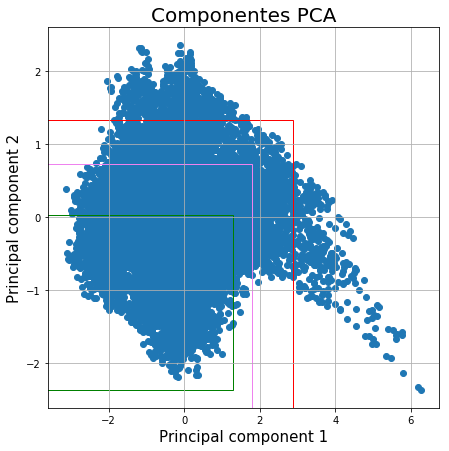

In [37]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Componentes PCA', fontsize=20)
ax.set_xlabel('Principal component 1',fontsize=15)
ax.set_ylabel('Principal component 2',fontsize=15)

#Plot
ax.scatter(finalDf.loc[:,finalDf.columns.values[0]],finalDf.loc[:,finalDf.columns.values[1]])

#Plot regiones --------------------------------
import matplotlib
#Fallo
rect1 = matplotlib.patches.Rectangle((x1F[0],x1F[1]), spamxF*2, spamyF*2, linewidth=1,edgecolor='g',facecolor='none',label='Zona de fallo')
ax.add_patch(rect1)
#Alerta
rect2 = matplotlib.patches.Rectangle((x1A[0],x1A[1]), spamxA*2, spamyA*2, linewidth=1,edgecolor='violet',facecolor='none',label='Zona de alerta')
ax.add_patch(rect2)
#Desgaste
rect3 = matplotlib.patches.Rectangle((x1D[0],x1D[1]), spamxD*2, spamyD*2, linewidth=1,edgecolor='r',facecolor='none',label='Zona de desgaste')
ax.add_patch(rect3)

#Plot lineas de regiones-----------------------
# p1=np.array([8,-3])
# p2=np.array([-4,3])
# ax.plot([p1[0],p2[0]],[p1[1],p2[1]],'r')
# p1=np.array([8,-3])-0.5
# p2=np.array([-4,3])-0.5
# ax.plot([p1[0],p2[0]],[p1[1],p2[1]])
# p1=np.array([8,-3])-1
# p2=np.array([-4,3])-1
# ax.plot([p1[0],p2[0]],[p1[1],p2[1]])

ax.grid()

# Obtener el estátus de cada muestra de cada máquina!

In [38]:
#Checar en que sección están: Normal, Desgaste, Alerta, Fallo

#Crear DataFrames con Status
St = pd.DataFrame(columns=['Status'])


#Checar si esta en fallo
i=1
for i in range (0,len(finalDf)): #corre de 0 a len(finalDf)
    #Fallo: si la maquina i esta entre el punto x1F y el punto x2F
    if (x1F[0]< finalDf.iloc[i]['Princ Comp 1']< x2F[0]) & (x1F[1]< finalDf.iloc[i]['Princ Comp 2']< x2F[1]): 
        St.loc[i]=['normal']
    #Alerta: si la maquina i esta entre el punto x1A y el punto x2A
    elif (x1A[0]< finalDf.iloc[i]['Princ Comp 1']< x2A[0]) & (x1A[1]< finalDf.iloc[i]['Princ Comp 2']< x2A[1]):
        St.loc[i]=['desgaste']
    #Desgaste: si la maquina i esta entre el punto x1D y el punto x2D
    elif (x1D[0]< finalDf.iloc[i]['Princ Comp 1']< x2D[0]) & (x1D[1]< finalDf.iloc[i]['Princ Comp 2']< x2D[1]):
        St.loc[i]=['alerta']
    else:
        St.loc[i]=['fallo']
    
    
    
St.tail()

,Status
12095,alerta
12096,alerta
12097,alerta
12098,alerta
12099,alerta


In [39]:
#Agregar status
finalDfMS = finalDfMaquina.join(St)

finalDfMS[35:37] #Mostrar 10 a 20

,Princ Comp 1,Princ Comp 2,Maquina,Status
35,-1.725953,0.445319,1,desgaste
36,-1.575559,0.362202,1,desgaste


### Plot regiones en todos los datos

In [47]:
# PLOT iterativo: tarda mucho más
# fig, ax = plt.subplots(figsize=(7,7))
# ax.set_title('Componentes PCA', fontsize=20)
# ax.set_xlabel('Principal component 1',fontsize=15)
# ax.set_ylabel('Principal component 2',fontsize=15)

# #Plot
# for i in range (0,len(finalDfMS)): #corre de 0 a len(finalDfMS)
#     #ax.scatter(finalDf.loc[:,finalDf.columns.values[0]],finalDf.loc[:,finalDf.columns.values[1]])

#     #si en Fallo
#     if (finalDfMS.loc[:,finalDfMS.columns.values[3]][i])=='fallo':
#         ax.scatter(finalDf.loc[:,finalDf.columns.values[0]][i],finalDf.loc[:,finalDf.columns.values[1]][i],c='r')
#     #si en Alerta
#     if (finalDfMS.loc[:,finalDfMS.columns.values[3]][i])=='alerta':
#         ax.scatter(finalDf.loc[:,finalDf.columns.values[0]][i],finalDf.loc[:,finalDf.columns.values[1]][i],c='b')
#     #si en Desgaste
#     if (finalDfMS.loc[:,finalDfMS.columns.values[3]][i])=='desgaste':
#         ax.scatter(finalDf.loc[:,finalDf.columns.values[0]][i],finalDf.loc[:,finalDf.columns.values[1]][i],c='g')
#     #si en Normal
#     if (finalDfMS.loc[:,finalDfMS.columns.values[3]][i])=='normal':
#         ax.scatter(finalDf.loc[:,finalDf.columns.values[0]][i],finalDf.loc[:,finalDf.columns.values[1]][i],c='y')    

# #Plot regiones --------------------------------
# import matplotlib
# #Fallo
# rect1 = matplotlib.patches.Rectangle((x1F[0],x1F[1]), spamxF*2, spamyF*2, linewidth=1,edgecolor='r',facecolor='none',label='Zona de fallo')
# ax.add_patch(rect1)
# #Alerta
# rect2 = matplotlib.patches.Rectangle((x1A[0],x1A[1]), spamxA*2, spamyA*2, linewidth=1,edgecolor='g',facecolor='none',label='Zona de alerta')
# ax.add_patch(rect2)
# #Desgaste
# rect3 = matplotlib.patches.Rectangle((x1D[0],x1D[1]), spamxD*2, spamyD*2, linewidth=1,edgecolor='violet',facecolor='none',label='Zona de desgaste')
# ax.add_patch(rect3)

# ax.set_xlim(-10,8)
# ax.set_ylim(-4,4)
# ax.grid()

# Crear tabla final
1 Agregar tiempo como el la tabla de inicio data

2 Agregar datos de la tabla de smoothData

3 Eliminar filas NaN

4 Agregar Status de cada fila (vector de features)

In [56]:
DataSmoothFinal = smoothData #seleccionar data de sensores filtrada

DataSmoothFinal = DataSmoothFinal.drop(['Tiempo','Numerar'],axis=1) #quitar tiempo (porque se modificó con el filtro (smooth))

DataSmoothFinal.insert(loc=0, column='Tiempo', value = data['Tiempo']) #agregar Tiempo #NOTA: Recuerda instrucción "insert" sin "="

DataSmoothFinal = DataSmoothFinal.dropna() #eliminar filas con NaN (por el filtro)

DataSmoothFinal = DataSmoothFinal.reset_index(drop=False) #quitar indice Maquinapara insertar status
DataSmoothFinal.insert(loc=1, column='Status',value=finalDfMS['Status'])
DataSmoothFinal = DataSmoothFinal.set_index('Maquina') #poner indidice Maquina de nuevo

DataSmoothFinal[95:105]#.tail()

,Status,Tiempo,LPCOutletTemp,HPCOutletTemp,LPT,TotalHP,PhysFanSpeed,PhysCoreSpeed,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 23,Sensor 24
Maquina,,,,,,,,,,,,,,,
1,fallo,100,642.188,1590.662,1405.002,553.494,2388.074,9046.232,47.452,521.722,2388.072,8130.316,8.42300,38.920,23.30370
1,fallo,101,642.300,1590.684,1406.652,553.500,2388.072,9046.950,47.498,521.768,2388.076,8129.372,8.42384,38.894,23.32158
1,fallo,102,642.456,1589.352,1405.774,553.504,2388.084,9048.002,47.504,521.710,2388.074,8129.704,8.43296,38.880,23.33538
1,fallo,103,642.498,1587.384,1405.504,553.682,2388.090,9049.560,47.544,521.530,2388.082,8129.006,8.43798,38.826,23.37008
1,fallo,104,642.464,1586.964,1405.528,553.662,2388.090,9049.478,47.532,521.722,2388.080,8129.030,8.42878,38.854,23.39148
1,fallo,105,642.422,1586.694,1403.902,553.440,2388.094,9050.006,47.466,521.774,2388.080,8129.334,8.43048,38.822,23.38682
1,fallo,106,642.408,1587.668,1404.110,553.486,2388.098,9049.510,47.430,521.698,2388.082,8129.416,8.43670,38.888,23.38680
1,fallo,107,642.344,1588.872,1404.972,553.550,2388.082,9048.974,47.402,521.772,2388.086,8129.816,8.43030,38.902,23.39546
1,fallo,108,642.600,1589.800,1404.224,553.708,2388.092,9047.724,47.410,521.794,2388.072,8131.240,8.42770,38.914,23.37032


### Plot datos iniciales en el tiempo con las etiquetas de clasificación a partir del PCA

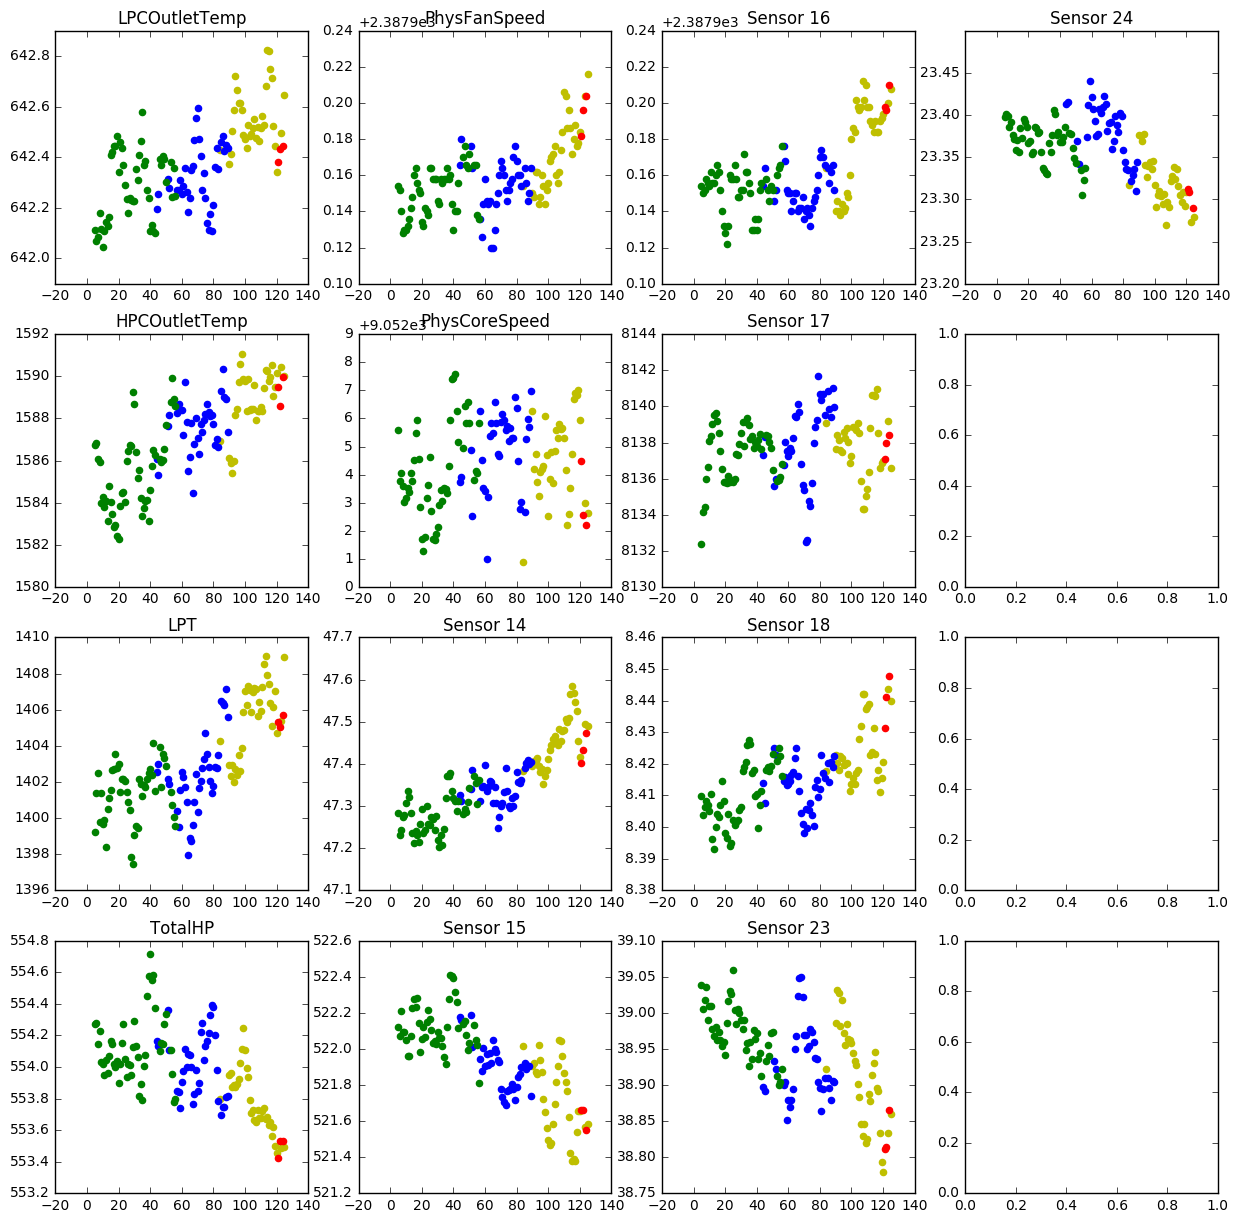

In [65]:
#Decido cuantos sensores a graficar (debe ser un numero con raíz entera para plotear)
numSensors=len(sensorsName)

#Decidir qué máquina se va a graficar (para mostrar datos)
M=99

sizePlot=int(math.sqrt(numSensors))+1

#Create subplot
f, axarr = plt.subplots(sizePlot,sizePlot,figsize=(15,15)) # crear plot
x=0
for i in range (1,numSensors): #corre de 1 hasta numSensors
    col = 1 #* SE PUEDE MODIFICAR* empezar a plot sensores a partir de la columna col
    
    #Obtener x de la matriz para plots
    if x==sizePlot:
        x=0
    #obtener y
    y= math.ceil((i)/sizePlot)-1
    
    
    #Obtener datos sensor
    sensor= list(DataSmoothFinal.loc[M,DataSmoothFinal.columns.values[col+i]])
    time= list(DataSmoothFinal.loc[M,'Tiempo']) #vector de Tiempos de la Maquina x
    status=list(DataSmoothFinal.loc[M,'Status']) #vector de Status
    
    #Crear dataframe con X=tiempo, Y=sensor, y status
    
    dataXYS=pd.DataFrame({'Tiempo':time ,'Sensor':sensor, 'Status':status})
    
    #Plot
    axarr[x,y].set_title(DataSmoothFinal.columns.values[col+i]) #title
    


    #Plot Alerta
    p=dataXYS.loc[dataXYS['Status']=='alerta']
    #axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='g')
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='y')
    
    #Plot Desgaste
    p=dataXYS.loc[dataXYS['Status']=='desgaste']
    #axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='g')
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='b')
    
    #Plot Normal
    p=dataXYS.loc[dataXYS['Status']=='normal']
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='g')
    #Plot Fallo
    p=dataXYS.loc[dataXYS['Status']=='fallo']
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='r')
    
    x=x+1
plt.show()
#En los diferentes plots se pueden distinguir aquellos que no serán útiles para clasificación:
#aquellos que no varian (bybass solo varia en un dato
#(sospechosamente :P osea puede ser solo ruido) por loq ue tampoco lo tomo en cuenta)

In [62]:
len(sensor)

121

In [60]:
dataXYS[95:105]

,Sensor,Status,Tiempo
95,23.33850,alerta,100
96,23.32590,alerta,101
97,23.32628,alerta,102
98,23.34060,alerta,103
99,23.33622,alerta,104
100,23.29966,alerta,105
101,23.29694,alerta,106
102,23.29742,alerta,107
103,23.29864,alerta,108
104,23.29430,alerta,109


Comparar con las siguientes gráficas de el mismo sensor filtrado

### Plot todas las máquinas 
Muestra cómo se comporta a través del tiempo.
Se debería ver una cambio paulatino de: Normal -> Desgaste -> Alerta -> Fallo

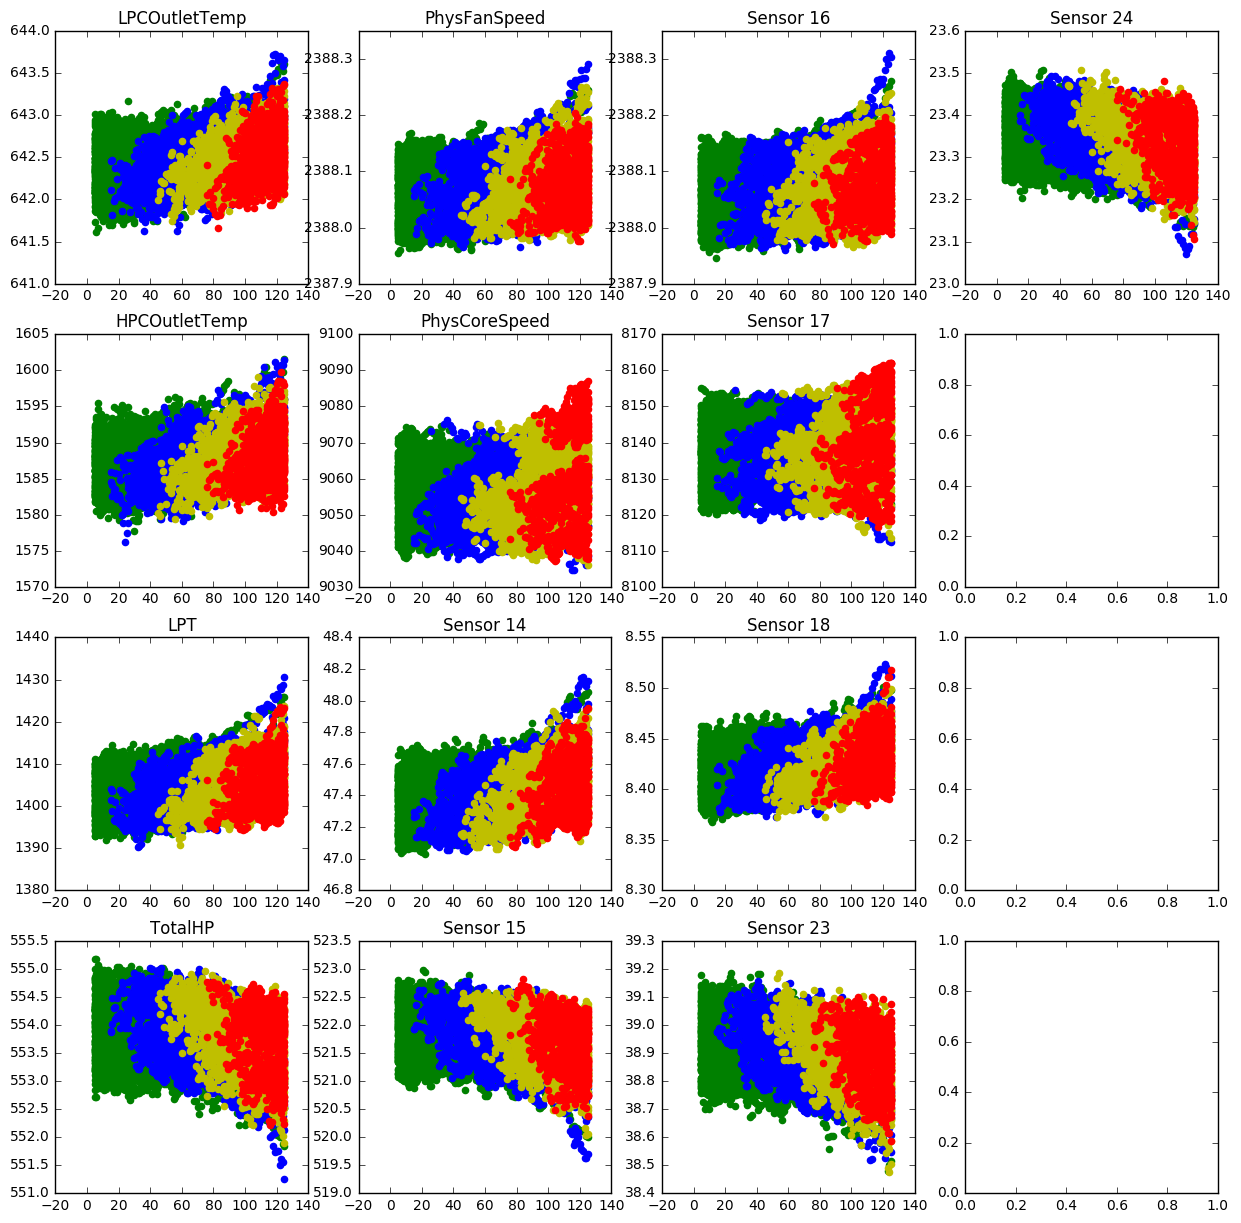

In [69]:
#Decido cuantos sensores a graficar (debe ser un numero con raíz entera para plotear)
numSensors=len(sensorsName)


sizePlot=int(math.sqrt(numSensors))+1

#Create subplot
f, axarr = plt.subplots(sizePlot,sizePlot,figsize=(15,15)) # crear plot
x=0
for i in range (1,numSensors): #corre de 1 hasta numSensors
    col = 1 #* SE PUEDE MODIFICAR* empezar a plot sensores a partir de la columna col
    
    #Obtener x de la matriz para plots
    if x==sizePlot:
        x=0
    #obtener y
    y= math.ceil((i)/sizePlot)-1
    
    
    #Obtener datos sensor
    sensor= list(DataSmoothFinal.loc[:,DataSmoothFinal.columns.values[col+i]])
    time= list(DataSmoothFinal.loc[:,'Tiempo']) #vector de Tiempos de la Maquina x
    status=list(DataSmoothFinal.loc[:,'Status']) #vector de Status
    
    #Crear dataframe con X=tiempo, Y=sensor, y status
    dataXYS=pd.DataFrame({'Tiempo':time ,'Sensor':sensor, 'Status':status})
    
    #Plot
    axarr[x,y].set_title(DataSmoothFinal.columns.values[col+i]) #title
    
    #Plot Normal
    p=dataXYS.loc[dataXYS['Status']=='normal']
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='g')
    
    #Plot Desgaste
    p=dataXYS.loc[dataXYS['Status']=='desgaste']
    #axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='g')
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='b')
    
    #Plot Alerta
    p=dataXYS.loc[dataXYS['Status']=='alerta']
    #axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='g')
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='y')
    
    #Plot Fallo
    p=dataXYS.loc[dataXYS['Status']=='fallo']
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='r')
    
    
    axarr[x,y].ticklabel_format(useOffset=False) #no usar cientific format
    x=x+1
plt.show()
#En los diferentes plots se pueden distinguir aquellos que no serán útiles para clasificación:
#aquellos que no varian (bybass solo varia en un dato
#(sospechosamente :P osea puede ser solo ruido) por loq ue tampoco lo tomo en cuenta)

Ahora:
Se ve una segregación de verdes al comienzo de los gráficos en general, al final cada señal termina en rojo, como se esperaría. Al rededor de los 100 vuelos empiezan a comenzar los fallos.

Antes:
Algo esta pasando: se esperaría que la mayoría de las máquinas estén trabajando en Estado Normal. Por lo que hay un fallo en el planteamineto del problema:
a) se debieron de tomar SOLO los primeros n (e.g. n=100) datos de cada máquina (*ya se hizo y no cambio). Así, se esperaría que la mayoría se encontráse en estado normal a alerta, por lo que todo aquello (siguientes datos) que se encuentre fuera de la "región segura" que se encuentre, estará acercandose a la "región de falla".

Se puede graficar el porcentaje de máquinas en cada categoria a través del tiempo

## Guardar datos y targets en CSV

In [72]:
#Exportar database

#Al comienzo Import database:
#nombreDB = 'train_FD001'

#Ahora
DataSmoothFinal.to_csv("Database/Modificados/"+nombreDB+"_TargetsPCA.csv")

## Fin de PCA

# Supervised Learning
En esta parte se ponen etiquetas a cada punto dependiendo de en qué región se encuentra dentro del plot anterior. Esto con el objetivo de crear el vector de Targets

### Crear vector de targets

In [128]:
# Import database
data2=importarDatabase("Database/"+nombreDB+".csv",'Maquina')


#Agregar columna para targets

dataTargetsManual = data2

dataTargetsManual.insert(1,'TTF',dataTargetsManual.Tiempo) #data parece que se modifica también al insertar (al igualar parece mandar solo referencia por valor, es decir, la direccion de memoria de los valores de "data")

dataTargetsManual.head()

#Agregar en la columna la clasificación dependiendo del threshold

threshold=[50,125,200]

dataTargetsManual['TTF'][(data.Tiempo<=threshold[0])] = 'long'
dataTargetsManual['TTF'][(data.Tiempo>threshold[0]) & (data.Tiempo<=threshold[1])] = 'medium'
dataTargetsManual['TTF'][(data.Tiempo>threshold[1]) & (data.Tiempo<=threshold[2])] = 'short'
dataTargetsManual['TTF'][(data.Tiempo>threshold[2])] = 'urgent'

dataTargetsManual[475:480]

C:\Users\grist\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\grist\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\grist\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\grist\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Tiempo,TTF,Lectura 1,Lectura 2,Lectura 3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPT,Fan,...,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24
Maquina,,,,,,,,,,,,,,,,,,,,,
2,284,urgent,-0.0006,0.0001,100,518.67,643.91,1601.35,1430.04,14.62,...,519.95,2388.21,8166.83,8.5291,0.03,395,2388,100,38.23,23.1196
2,285,urgent,-0.0007,0.0004,100,518.67,643.67,1596.84,1431.17,14.62,...,519.91,2388.22,8164.83,8.5242,0.03,396,2388,100,38.39,23.1155
2,286,urgent,-0.0010,-0.0003,100,518.67,643.44,1603.63,1429.57,14.62,...,519.51,2388.22,8169.97,8.4932,0.03,395,2388,100,38.33,23.0169
2,287,urgent,-0.0005,0.0006,100,518.67,643.85,1608.50,1430.84,14.62,...,519.81,2388.21,8175.57,8.5365,0.03,398,2388,100,38.43,23.0848
3,1,long,0.0008,0.0005,100,518.67,642.04,1584.20,1398.13,14.62,...,522.24,2388.00,8138.40,8.4207,0.03,391,2388,100,38.96,23.3205


In [129]:
porcLong = len(dataTargetsManual.loc[dataTargetsManual['TTF']=='long'])/len(dataTargetsManual) * 100
porcMedi = len(dataTargetsManual.loc[dataTargetsManual['TTF']=='medium'])/len(dataTargetsManual) * 100
porcShor = len(dataTargetsManual.loc[dataTargetsManual['TTF']=='short'])/len(dataTargetsManual) * 100
porcUrge = len(dataTargetsManual.loc[dataTargetsManual['TTF']=='urgent'])/len(dataTargetsManual) * 100

print('Value: long   , Count:',len(dataTargetsManual.loc[dataTargetsManual['TTF']=='long']),', Porcentage:', round(porcLong, 2),'%')
print('Value: medium , Count:',len(dataTargetsManual.loc[dataTargetsManual['TTF']=='medium']),', Porcentage:', round(porcMedi, 2),'%')
print('Value: short  , Count:',len(dataTargetsManual.loc[dataTargetsManual['TTF']=='short']),', Porcentage:', round(porcShor, 2), '%')
print('Value: urgent , Count:',len(dataTargetsManual.loc[dataTargetsManual['TTF']=='urgent']),', Porcentage:', round(porcUrge, 2), '%')

Value: long   , Count: 5000 , Porcentage: 24.24 %
Value: medium , Count: 7500 , Porcentage: 36.35 %
Value: short  , Count: 6127 , Porcentage: 29.7 %
Value: urgent , Count: 2004 , Porcentage: 9.71 %


## Plot datos

### Cambiar tiempo de [0 , x] a [-x a 0]

In [130]:
dataTargetsManualSorted = dataTargetsManual

for i in np.unique(sensorData.index):
    #dataTargetsManual.loc[i]['Tiempo']= ( sorted(dataTargetsManual.loc[i]['Tiempo'], reverse=True) ) #cambiar sorted
    dataTargetsManualSorted.loc[i]['Tiempo']= dataTargetsManual.loc[i]['Tiempo'] - max(dataTargetsManual.loc[i]['Tiempo'])


C:\Users\grist\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [167]:
dataTargetsManual[463:500]

,Tiempo,TTF,Lectura 1,Lectura 2,Lectura 3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPT,Fan,...,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24
Maquina,,,,,,,,,,,,,,,,,,,,,
2,-15,urgent,-0.0004,0.0001,100,518.67,643.27,1600.02,1426.70,14.62,...,520.56,2388.20,8155.61,8.5126,0.03,395,2388,100,38.48,23.1781
2,-14,urgent,-0.0036,-0.0003,100,518.67,643.71,1598.88,1418.55,14.62,...,519.72,2388.20,8163.69,8.5098,0.03,394,2388,100,38.53,23.1182
2,-13,urgent,0.0000,0.0004,100,518.67,643.18,1598.98,1427.83,14.62,...,519.73,2388.18,8161.62,8.4880,0.03,396,2388,100,38.27,23.1046
2,-12,urgent,0.0010,0.0001,100,518.67,643.67,1595.30,1421.80,14.62,...,520.00,2388.17,8157.59,8.5136,0.03,396,2388,100,38.67,23.1980
2,-11,urgent,-0.0018,0.0004,100,518.67,643.82,1605.46,1429.66,14.62,...,520.09,2388.17,8163.22,8.5177,0.03,396,2388,100,38.41,23.0895
2,-10,urgent,0.0017,-0.0004,100,518.67,643.91,1601.47,1424.78,14.62,...,519.93,2388.17,8171.90,8.5206,0.03,395,2388,100,38.68,23.0609
2,-9,urgent,0.0000,-0.0003,100,518.67,643.44,1597.61,1423.67,14.62,...,519.72,2388.24,8160.69,8.5285,0.03,396,2388,100,38.49,23.0702
2,-8,urgent,0.0006,0.0005,100,518.67,643.64,1594.80,1426.95,14.62,...,519.66,2388.26,8164.77,8.5237,0.03,395,2388,100,38.51,23.0460
2,-7,urgent,-0.0061,0.0000,100,518.67,643.63,1594.21,1422.89,14.62,...,519.91,2388.21,8163.77,8.4889,0.03,396,2388,100,38.56,23.1462


### Plot

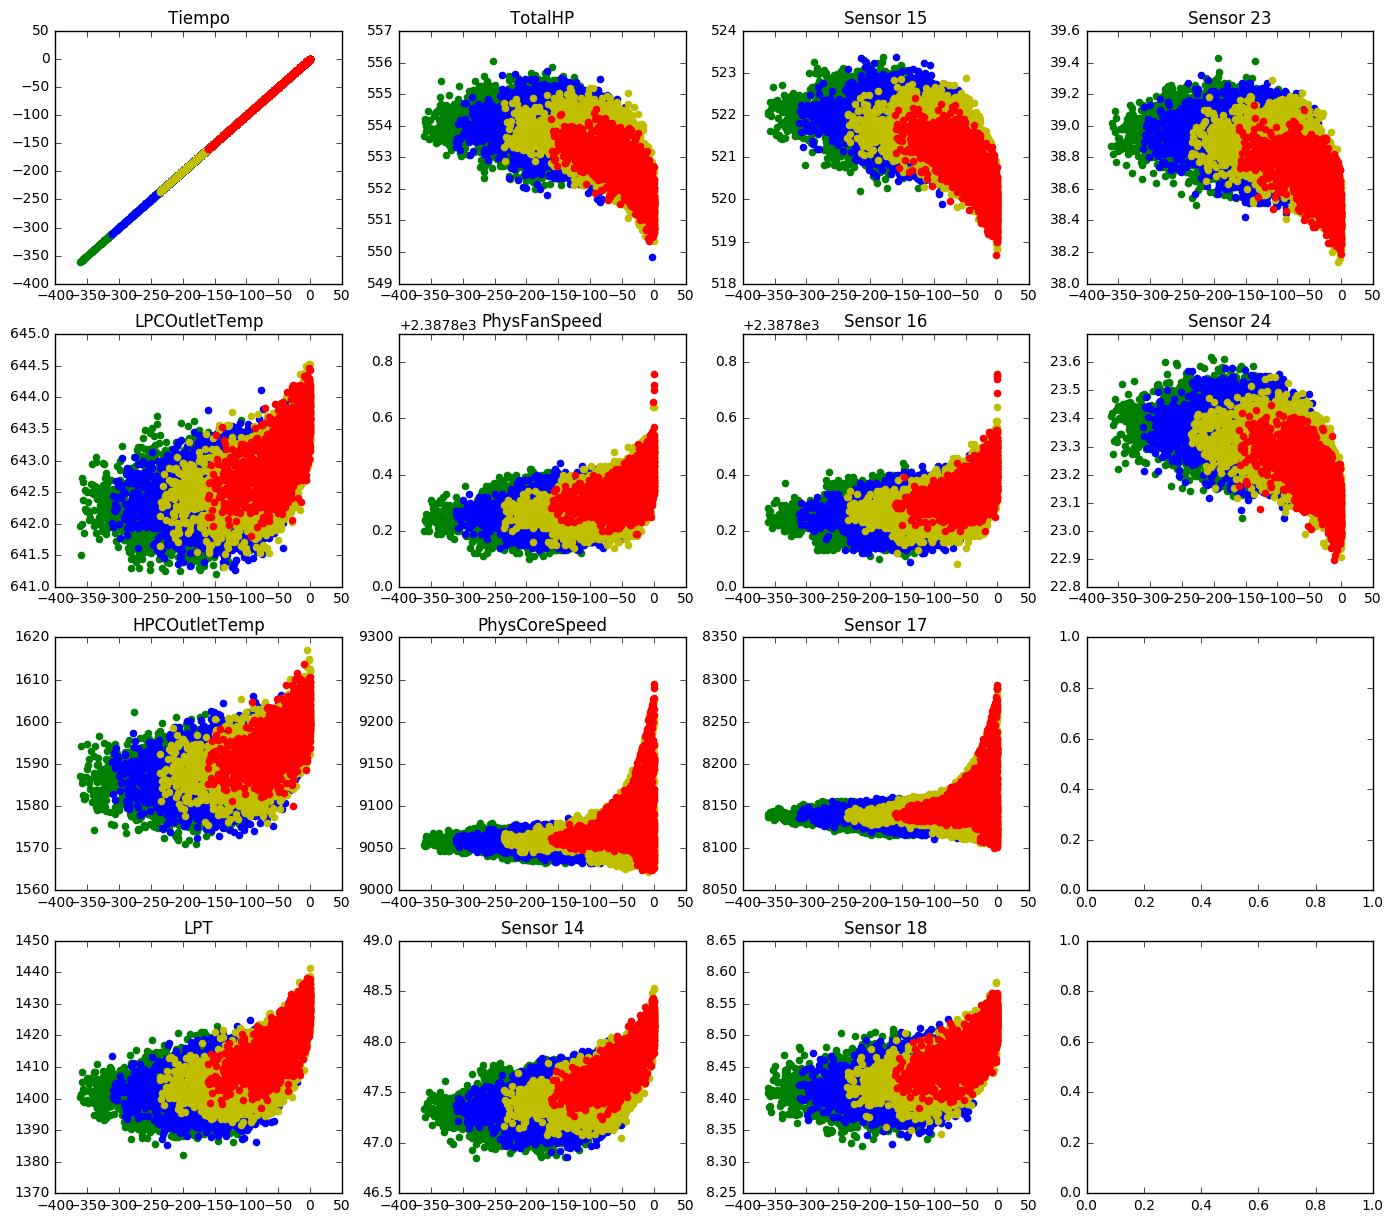

In [166]:
#Decido cuantos sensores a graficar (debe ser un numero con raíz entera para plotear)
numSensors=len(sensorsName)

#Create subplot
sizePlot=int(math.sqrt(numSensors))+1
f, axarr = plt.subplots(sizePlot,sizePlot,figsize=(17,15)) # crear plot

x=0
for k,i in zip(sensorsName,range(len(sensorsName))): #doble for, cuenta sobre los valores de sensorsName=k y  range(len(sensorsName))=i
    
    #Obtener x de la matriz para plots
    if x==sizePlot:
        x=0
    #obtener y
    y= math.ceil((i+1)/sizePlot)-1
    
    
    #Obtener datos sensor
    sensor= list(dataTargetsManual[k])
    time= list(dataTargetsManual['Tiempo']) #vector de Tiempos de la Maquina x
    status=list(dataTargetsManual['TTF']) #vector de Status
    #Crear dataframe con X=tiempo, Y=sensor, y status
    dataXYTTF=pd.DataFrame({'Tiempo':time ,'Sensor':sensor, 'TTF':status})
    
    
    #Plot
    axarr[x,y].set_title(k) #title
    
    #Plot Long
    p=dataXYTTF.loc[dataXYTTF['TTF']=='long']
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='g')
    
    #Plot Medium
    p=dataXYTTF.loc[dataXYTTF['TTF']=='medium']
    #axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='g')
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='b')
    
    #Plot Short
    p=dataXYTTF.loc[dataXYTTF['TTF']=='short']
    #axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='g')
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='y')
    

    #Plot Urgent
    p=dataXYTTF.loc[dataXYTTF['TTF']=='urgent']
    axarr[x,y].scatter(p['Tiempo'],p['Sensor'],color='r')
    
    x=x+1

In [170]:
dataTargetsManual.tail()

,Tiempo,TTF,Lectura 1,Lectura 2,Lectura 3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPT,Fan,...,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24
Maquina,,,,,,,,,,,,,,,,,,,,,
100,-4,short,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735
100,-3,short,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594
100,-2,short,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333
100,-1,short,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640
100,0,short,-0.0032,-0.0005,100,518.67,643.85,1600.38,1432.14,14.62,...,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100,38.37,23.0522


### Guardar data con targets

In [171]:
#Exportar database

#Al comienzo Import database:
#nombreDB = 'train_FD001'

#Ahora
dataTargetsManual.to_csv("Database/Modificados/"+nombreDB+"_ManualTargets.csv")

In [172]:
sensorsName

('Tiempo',
 'LPCOutletTemp',
 'HPCOutletTemp',
 'LPT',
 'TotalHP',
 'PhysFanSpeed',
 'PhysCoreSpeed',
 'Sensor 14',
 'Sensor 15',
 'Sensor 16',
 'Sensor 17',
 'Sensor 18',
 'Sensor 23',
 'Sensor 24')